In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

# Question #1 (a)

In [2]:
raw_data = pd.read_csv('Koop-Tobias.csv')
raw_data.head()

,PERSONID,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS
0,1,13,1.82,1,0,1.0,12,12,0,1
1,1,18,3.29,3,7,1.0,12,12,0,1
2,1,18,3.21,5,9,1.0,12,12,0,1
3,1,18,3.06,6,10,1.0,12,12,0,1
4,2,15,2.14,4,6,1.5,12,12,0,1


In [3]:
X = raw_data.drop(columns=['PERSONID', 'LOGWAGE', 'TIMETRND'])
X = sm.add_constant(X)
y = raw_data['LOGWAGE']

results = sm.OLS(y, X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                LOGWAGE   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     546.6
Date:                Wed, 27 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:24:58   Log-Likelihood:                -12255.
No. Observations:               17919   AIC:                         2.453e+04
Df Residuals:                   17911   BIC:                         2.459e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9897      0.034     29.198      0.0

#### marginal effect

In [5]:
X_bar = X.mean()
X_bar['BRKNHOME'] = 0
X_bar['EDUC'] = 12

In [6]:
X_bar = np.asarray(X_bar)
coef = np.asarray(results.params)

In [7]:
np.exp(np.matmul(X_bar, coef))*results.params[1]

0.6800472008090137

# Question #1 (b)

In [8]:
X['EDUC_2'] = np.power(X['EDUC'], 2)
X['EDUC_3'] = np.power(X['EDUC'], 3)

results_2 = sm.OLS(y, X).fit()
R = np.array(([0,0,0,0,0,0,0,0,0,1], [0,0,0,0,0,0,0,0,1,0]))

In [9]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                LOGWAGE   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     428.9
Date:                Wed, 27 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:24:58   Log-Likelihood:                -12240.
No. Observations:               17919   AIC:                         2.450e+04
Df Residuals:                   17909   BIC:                         2.458e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3650      0.440      3.102      0.0

In [10]:
print(results_2.f_test(R))

<F test: F=array([[14.34648984]]), p=5.948185372443663e-07, df_denom=17909, df_num=2>


# Question #1 (c)

In [11]:
X = raw_data['EDUC']
X = sm.add_constant(X)

y = raw_data['LOGWAGE']
results_3 = sm.OLS(y, X).fit()

y_pred = results_3.predict(X)
lin_params = results_3.params
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                LOGWAGE   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1497.
Date:                Wed, 27 Feb 2019   Prob (F-statistic):          1.39e-314
Time:                        23:24:58   Log-Likelihood:                -13270.
No. Observations:               17919   AIC:                         2.654e+04
Df Residuals:                   17917   BIC:                         2.656e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3296      0.025     52.589      0.0

In [12]:
from statsmodels.nonparametric.kernel_regression import KernelReg
X = raw_data['EDUC']
bw = [(np.std(X, ddof=1)* (len(X))**(-1/5))]

results_4 = KernelReg(y, X, 'c',reg_type='lc', bw=bw).fit()
y_pred_np = results_4[0]

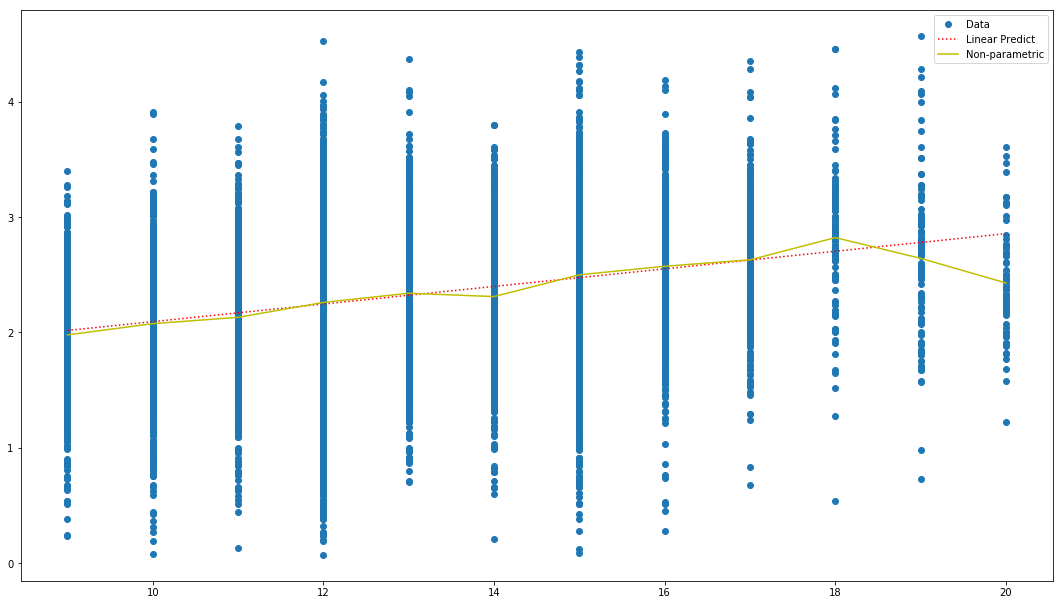

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

new_x_1, new_y_1 = zip(*sorted(zip(X, y_pred)))
new_x_2, new_y_2 = zip(*sorted(zip(X, y_pred_np)))

ax.plot(X, y, 'o', label="Data")
ax.plot(new_x_1, new_y_1, 'r', label="Linear Predict", linestyle='dotted')
ax.plot(new_x_2, new_y_2, 'y', label="Non-parametric")

ax.legend(loc="best")

In [16]:
marginal_effect = results_4[1]*100

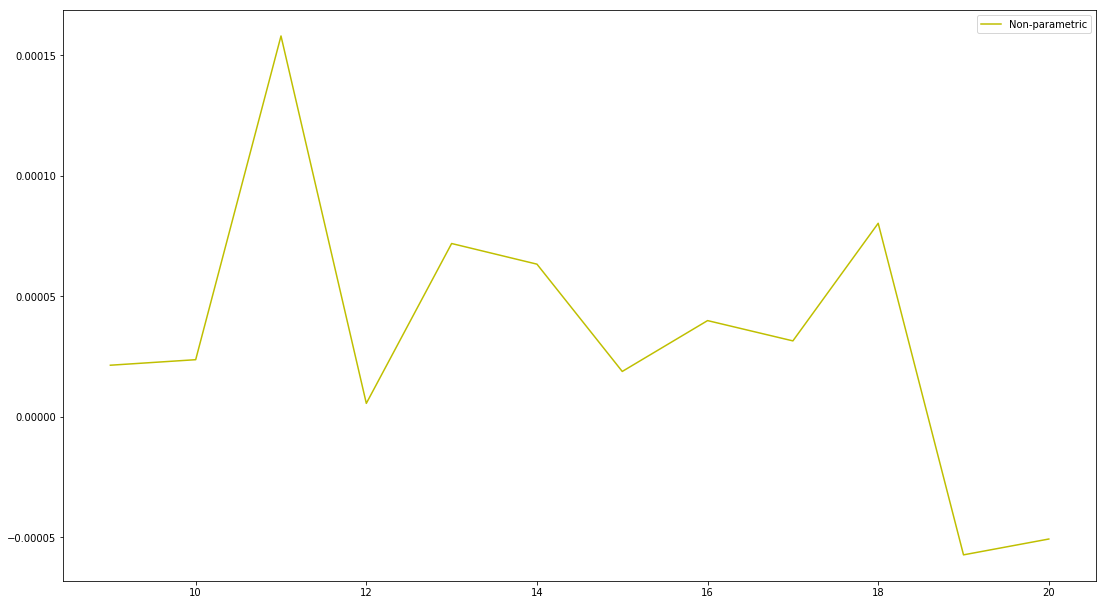

In [18]:
fig, ax_2 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
#ax.plot(X, y, 'o', label="Data")
new_x, new_y = zip(*sorted(zip(X, marginal_effect)))

ax_2.plot(new_x, new_y, 'y', label="Non-parametric")
#ax_2.plot(X, np.full(X.shape, lin_params[1]), 'g', label="Linear", linestyle='dashed')

ax_2.legend(loc="best")

# Question #2

In [19]:
raw_data = pd.read_csv('cps71.csv')

In [20]:
X = raw_data['age']
X = sm.add_constant(X)
y = raw_data['logwage']

results = sm.OLS(y, X).fit()
lin_params = results.params

y_pred_lin = results.predict(X)

X['age_2'] =np.power(raw_data['age'], 2)

results_2 = sm.OLS(y, X).fit()
quad_params = results_2.params

y_pred_quad = results_2.predict(X)

In [21]:
bw = [(np.std(X['age'], ddof=1)* (len(X))**(-1/5))]
results_3 = KernelReg(y, X['age'], 'c', reg_type='lc', bw=bw).fit()
y_pred_np = results_3[0]

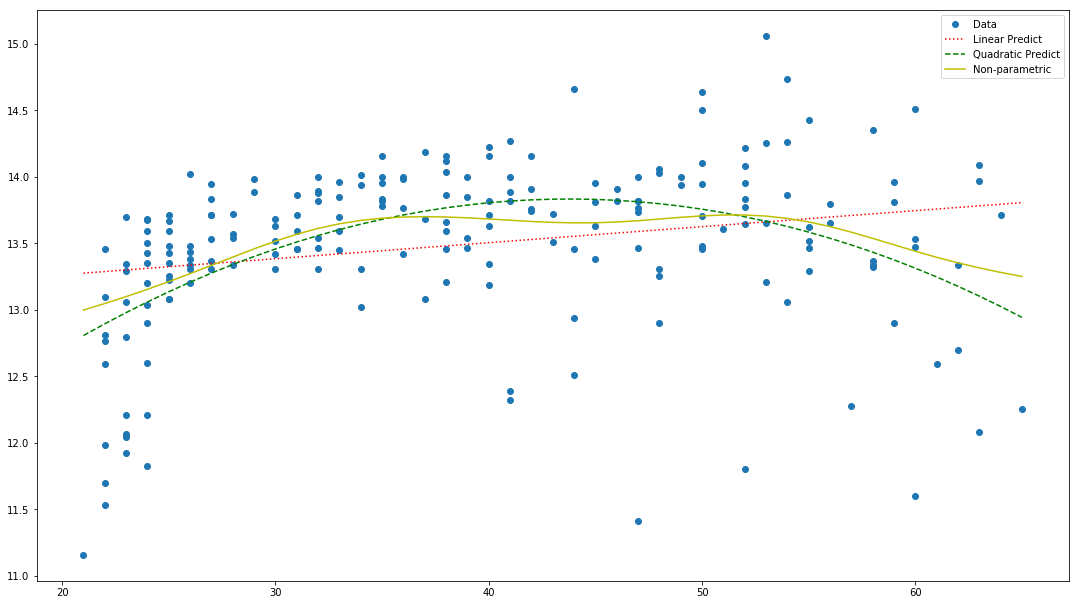

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(X['age'], y, 'o', label="Data")
ax.plot(X['age'], y_pred_lin, 'r', label="Linear Predict", linestyle='dotted')
ax.plot(X['age'], y_pred_quad, 'g', label="Quadratic Predict", linestyle='dashed')
ax.plot(X['age'], y_pred_np, 'y', label="Non-parametric")

ax.legend(loc="best")

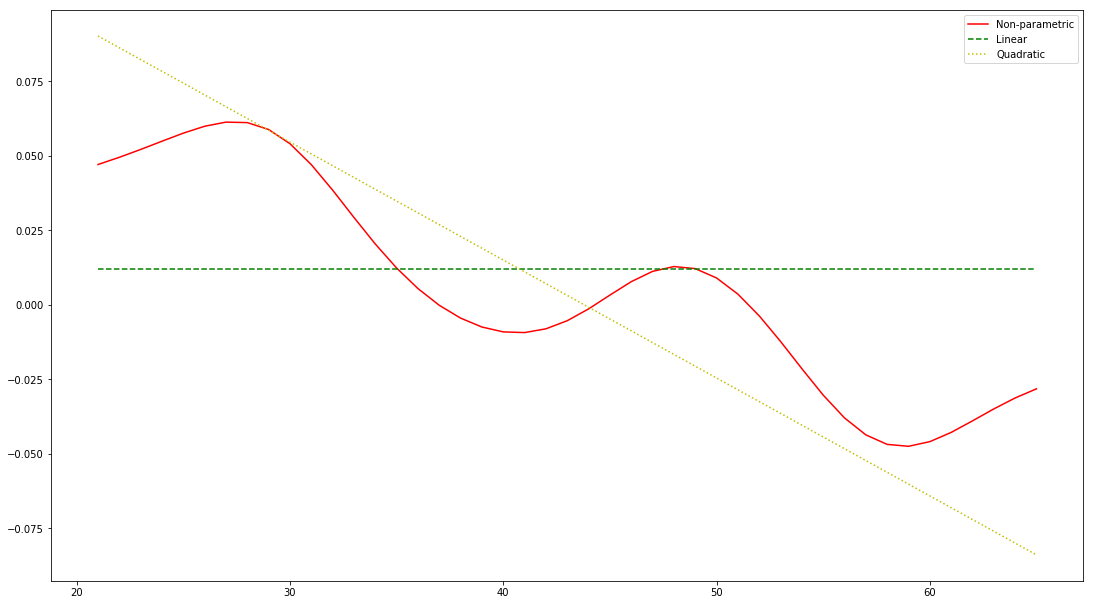

In [23]:
np_marginal = results_3[1]

fig, ax_2 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax_2.plot(X['age'], np_marginal*100, 'r', label="Non-parametric")
ax_2.plot(X['age'], np.full(X['age'].shape, lin_params[1]), 'g', label="Linear", linestyle='dashed')
ax_2.plot(X['age'], X['age']*quad_params[2]*2 + quad_params[1], 'y', label="Quadratic", linestyle='dotted')

ax_2.legend(loc="best")

# Question #3(a)

In [141]:
import math
sample_sizes = [25, 50, 100] #size of sample
# y = 4 + 2 * x + error
# N error N(0,1)
# T error T(4)
coef_big_mat = []
z_big_mat = []
t_big_mat = []
for n in sample_sizes:
    coef_n = []
    coef_t = []
    z_n = []
    z_t = []
    t_n = []
    t_t = []
    for t in range(1000):
        n_error = np.random.normal(0, 1, n)
        t_error = np.random.standard_t(4, n)
        x = np.random.uniform(0, 3, n)
        y_n = 4 + 2*x + n_error
        y_t = 4 + 2*x + t_error
        sd = math.sqrt(1/np.sum(np.power(x, 2)))
        
        # N Error
        result_n = sm.OLS(y_n, sm.add_constant(x)).fit()
        coef_n.append(result_n.params[1])
        z = (result_n.params[1]-0)/sd
        se = result_n.bse[1]
        t = (result_n.params[1]-0)/se
        t_n.append(t)
        z_n.append(z)
        
        # T Error
        result_t = sm.OLS(y_t, sm.add_constant(x)).fit()
        coef_t.append(result_t.params[1])
        z = (result_t.params[1]-0)/sd
        se = result_t.bse[1]
        t = (result_t.params[1]-0)/se
        t_t.append(t)
        z_t.append(z)
        
    coef_big_mat.append([coef_n, coef_t])
    z_big_mat.append([z_n, z_t])
    t_big_mat.append([t_n, t_t])

In [142]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

N Error Case:
n=25, mean=2.012488983333248, var=0.05249862604346628, se=0.2291257865092148
n=50, mean=2.004038638956284, var=0.028643210231471507, se=0.16924305076271673
n=100, mean=1.9998946283499164, var=0.01354834677651397, se=0.1163973658486908


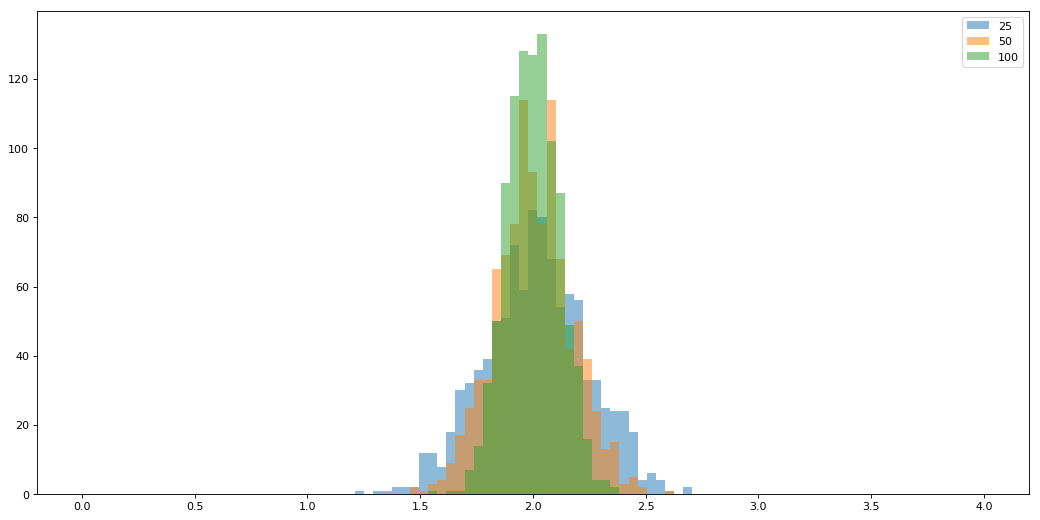

T Error Case:
n=25, mean=2.0060822548285806, var=0.10567402834654102, se=0.32507541947452906
n=50, mean=2.0113618504889645, var=0.05352231792474029, se=0.23134890949546377
n=100, mean=1.9884132856956598, var=0.02630018530277698, se=0.16217331871419843


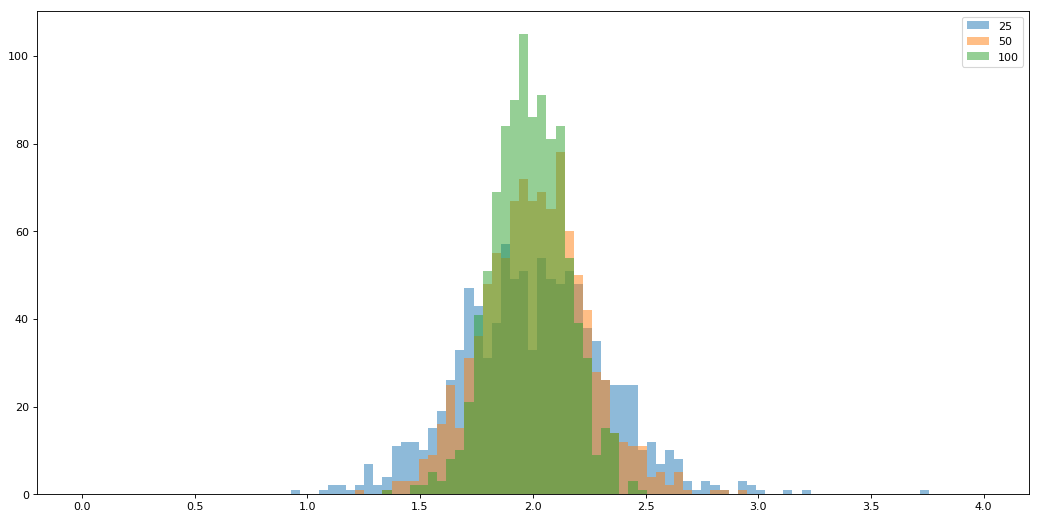

In [143]:
bins = np.linspace(-0, 4, 100)

print("N Error Case:")

figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    print("n="+str(sample_sizes[i])+", mean="+str(np.mean(coef_big_mat[i][0]))+", var="+str(np.var(coef_big_mat[i][0]))+", se="+str(math.sqrt(np.var(coef_big_mat[i][0]))))
    pyplot.hist(coef_big_mat[i][0], bins, alpha=0.5, label=str(sample_sizes[i]))
pyplot.legend(loc='upper right')
pyplot.show()

print("T Error Case:")
    
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    print("n="+str(sample_sizes[i])+", mean="+str(np.mean(coef_big_mat[i][1]))+", var="+str(np.var(coef_big_mat[i][1]))+", se="+str(math.sqrt(np.var(coef_big_mat[i][1]))))
    pyplot.hist(coef_big_mat[i][1], bins, alpha=0.5, label=str(sample_sizes[i]))
pyplot.legend(loc='upper right')
pyplot.show()

# Question #3(b)

### Z Statistics

N Error Case:
n=25, mean=17.268458433839506, var=6.4753934834130495
size of test: 0.0
n=50, mean=24.478947133064747, var=6.603008365729441
size of test: 0.0
n=100, mean=34.689623939681276, var=6.482227300655119
size of test: 0.0


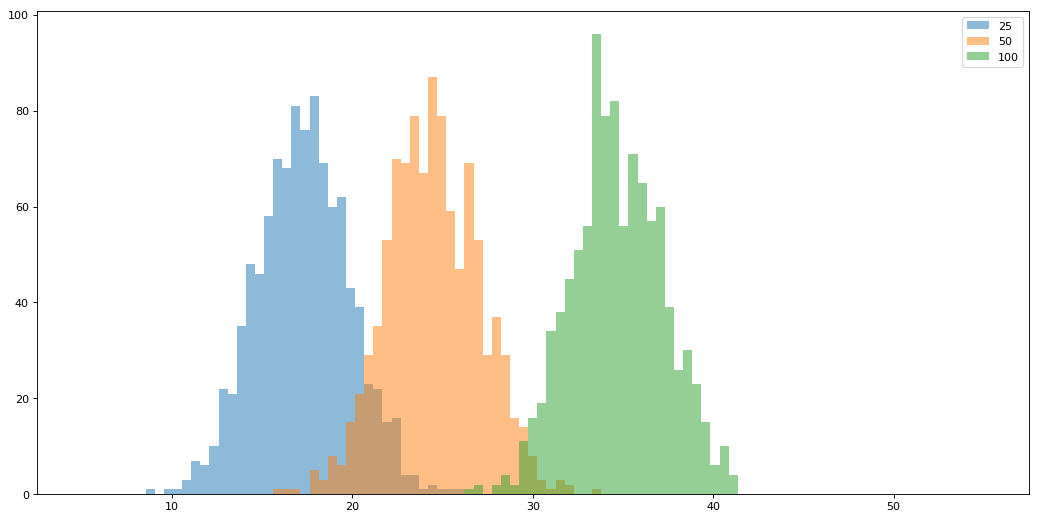

T Error Case:
n=25, mean=17.21294748809783, var=10.290138070588648
size of test: 0.0
n=50, mean=24.57051460244579, var=10.509378822227127
size of test: 0.0
n=100, mean=34.48750148998313, var=10.095753493509088
size of test: 0.0


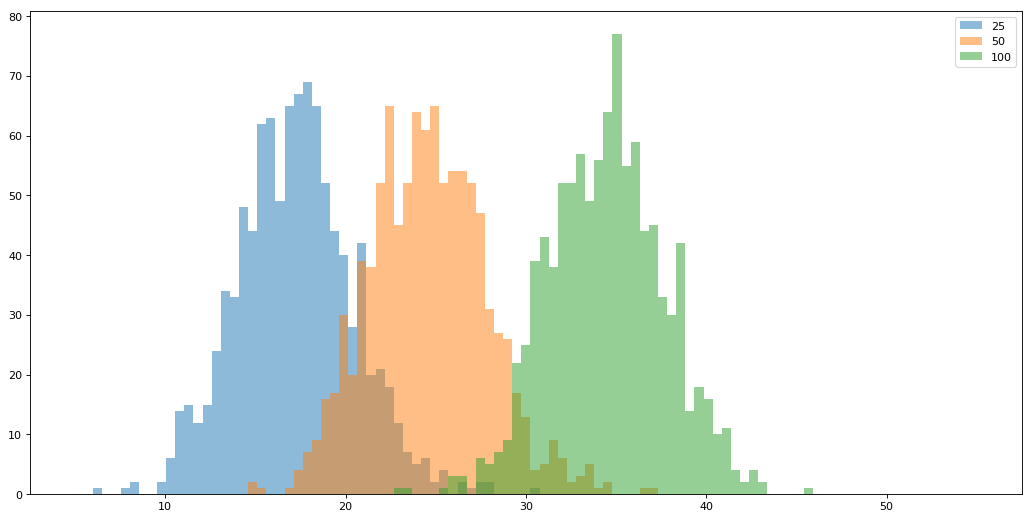

In [144]:
bins = np.linspace(5, 55, 100)

print("N Error Case:")

figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    print("n="+str(sample_sizes[i])+", mean="+str(np.mean(z_big_mat[i][0]))+", var="+str(np.var(z_big_mat[i][0])))
    count = 0
    for element in z_big_mat[i][0]:
        if (element > 1.96 or element < -1.96):
            count += 1
    print("size of test:", 1 - count/1000)
    pyplot.hist(z_big_mat[i][0], bins, alpha=0.5, label=str(sample_sizes[i]))
pyplot.legend(loc='upper right')
pyplot.show()

print("T Error Case:")
    
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    print("n="+str(sample_sizes[i])+", mean="+str(np.mean(z_big_mat[i][1]))+", var="+str(np.var(z_big_mat[i][1])))
    count = 0
    for element in z_big_mat[i][1]:
        if (element > 1.96 or element < -1.96):
            count += 1
    print("size of test:", 1 - count/1000)
    pyplot.hist(z_big_mat[i][1], bins, alpha=0.5, label=str(sample_sizes[i]))
pyplot.legend(loc='upper right')
pyplot.show()

### T Statistics

N Error Case:
n=25, mean=8.735152019547114, var=3.3629344001402646
size of test: 0.968
n=50, mean=12.228941819914041, var=3.263578798541486
size of test: 0.635
n=100, mean=17.351736876535266, var=3.5030257513385066
size of test: 0.0020000000000000018


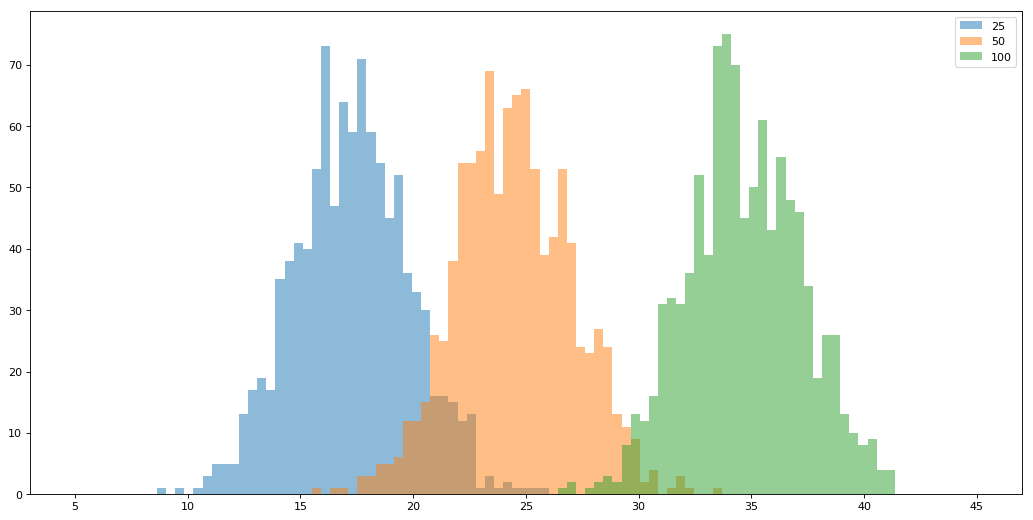

T Error Case:
n=25, mean=6.627049466024269, var=4.000635431527382
size of test: 0.991
n=50, mean=9.186082838319468, var=4.161971560960327
size of test: 0.957
n=100, mean=12.504484595267229, var=4.389229381841637
size of test: 0.5329999999999999


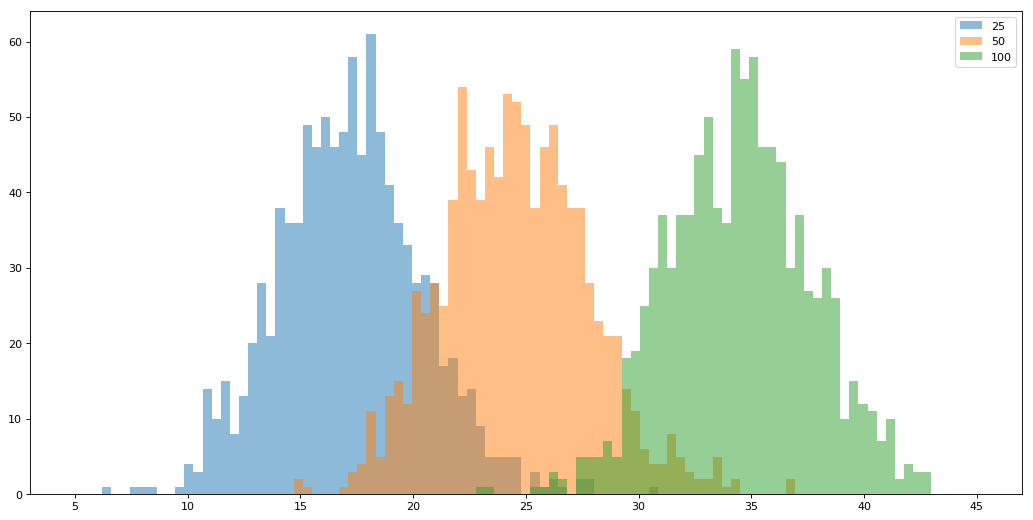

In [145]:
bins = np.linspace(5, 45, 100)

print("N Error Case:")

figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    print("n="+str(sample_sizes[i])+", mean="+str(np.mean(t_big_mat[i][0]))+", var="+str(np.var(t_big_mat[i][0])))
    count = 0
    for element in t_big_mat[i][0]:
        if (element > 12.706 or element < -12.706):
            count += 1
    print("size of test:", 1 - count/1000)
    pyplot.hist(z_big_mat[i][0], bins, alpha=0.5, label=str(sample_sizes[i]))
pyplot.legend(loc='upper right')
pyplot.show()

print("T Error Case:")
    
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    print("n="+str(sample_sizes[i])+", mean="+str(np.mean(t_big_mat[i][1]))+", var="+str(np.var(t_big_mat[i][1])))
    count = 0
    for element in t_big_mat[i][1]:
        if (element > 12.706 or element < -12.706):
            count += 1
    print("size of test:", 1 - count/1000)
    pyplot.hist(z_big_mat[i][1], bins, alpha=0.5, label=str(sample_sizes[i]))
pyplot.legend(loc='upper right')
pyplot.show()

# Question #3(c)

In [146]:
sample_sizes = [25, 50, 100] #size of sample
# y = 4 + 2 * x + error
print("N Error Case:")
sample_X = np.random.uniform(0, 3, 25)
sample_n_error = np.random.normal(0, 1, 25)
sample_y_n = 4 + 2*sample_X + sample_n_error
result_original = sm.OLS(sample_y_n, sm.add_constant(sample_X)).fit()
beta_1 = result_original.params[0]
beta_2 = result_original.params[1]
u_hat = sample_y_n - beta_1 - beta_2 * sample_X

coef = []
for t in range(1000):
    u_star = np.random.choice(u_hat, 25)
    y_star = beta_1 + beta_2 * sample_X + u_star
    result_bootstrap = sm.OLS(y_star, sm.add_constant(sample_X)).fit()
    coef.append(result_bootstrap.params[1])
print("sample beta:", str(beta_2))    
print("bootstrap beta:", str(np.mean(coef)))
print("bootstrap se:", str(math.sqrt(np.var(coef))))


print("T Error Case:")
sample_X = np.random.uniform(0, 3, 25)
sample_t_error = np.random.standard_t(4, 25)
sample_y_t = 4 + 2*sample_X + sample_t_error
result_original = sm.OLS(sample_y_t, sm.add_constant(sample_X)).fit()
beta_1 = result_original.params[0]
beta_2 = result_original.params[1]
u_hat = sample_y_n - beta_1 - beta_2 * sample_X

coef = []
for t in range(1000):
    u_star = np.random.choice(u_hat, 25)
    y_star = beta_1 + beta_2 * sample_X + u_star
    result_bootstrap = sm.OLS(y_star, sm.add_constant(sample_X)).fit()
    coef.append(result_bootstrap.params[1])
print("sample beta:", str(beta_2))    
print("bootstrap beta:", str(np.mean(coef)))
print("bootstrap se:", str(math.sqrt(np.var(coef))))


N Error Case:
sample beta: 1.7102102215594508
bootstrap beta: 1.7159064524085028
bootstrap se: 0.1928669790849424
T Error Case:
sample beta: 1.2898398249410796
bootstrap beta: 1.2824862775758408
bootstrap se: 0.5631121845139818
